In [78]:
import os
import numpy as np
import pandas as pd
from typing import List, Any
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
columns = ['', 'headline', 'url', 'publisher', 'date', 'stock']
df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')

# remove the first column as it is not needed
df = df.iloc[:, 1:]
df

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX



## Descriptive Statistics

In [80]:
clean_data = './data/clean/raw_analyst_ratings.csv'
if os.path.exists(clean_data):
    os.remove(clean_data)
    print(f'{clean_data} has been deleted.')
else:
    print(f'{clean_data} doest not exist')

./data/clean/raw_analyst_ratings.csv doest not exist


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [82]:
df['headline_len'] = df['headline'].str.len()
df

,headline,url,publisher,date,stock,headline_len
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87
...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54


In [83]:
df['date'] = pd.to_datetime(df['date'], utc=True, format='mixed')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day
df

,headline,url,publisher,date,stock,headline_len,month,year,day
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,6,2020,5
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,6,2020,3
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,5,2020,26
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,5,2020,22
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,5,2020,22
...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,38,8,2011,29
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,52,6,2011,22
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,56,6,2011,21
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,54,6,2011,21


In [ ]:
file_path = '../data/clean/raw_analyst_ratings.csv'

try:
    df.to_csv(file_path)
    print(f"File saved successfully at {file_path}")
except Exception as e:
    print(f"Failed to save file at {file_path}: {e}")

In [70]:
PUBLICATION_GROUPED_BY_YEAR = df.groupby(['year']).size().reset_index()
PUBLICATION_GROUPED_BY_YEAR.columns = ["year", "count"]

PUBLICATION_GROUPED_BY_MONTH = df.groupby(['year', 'month']).size().reset_index()
PUBLICATION_GROUPED_BY_MONTH.columns = ["year", "month", "count"]

PUBLICATION_GROUPED_BY_DAY = df.groupby(['year', 'month', 'day']).size().reset_index()
PUBLICATION_GROUPED_BY_DAY.columns = ["year", "month", "day", "count"]

In [71]:
# single count functions
def count_publication_by_year(year: int):
    """
    Count the number of publications for a specific year.

    :param year: The year for which to count publications.
    :type year: int
    :returns: A DataFrame containing the count of publications for the specified year.
    :rtype: pandas.DataFrame
    """
    return PUBLICATION_GROUPED_BY_YEAR[PUBLICATION_GROUPED_BY_YEAR["year"] == year]


def count_publication_by_month(year: int, month: int):
    """
    Count the number of publications for a specific month in a specific year.

    :param year: The year for which to count publications.
    :type year: int
    :param month: The month for which to count publications (1-12).
    :type month: int
    :returns: A DataFrame containing the count of publications for the specified year and month.
    :rtype: pandas.DataFrame
    """
    return PUBLICATION_GROUPED_BY_MONTH[
        (PUBLICATION_GROUPED_BY_MONTH["year"] == year) &
        (PUBLICATION_GROUPED_BY_MONTH["month"] == month)
        ]


def count_publication_by_day(day: int, month: int, year: int):
    """
    Count the number of publications for a specific day, month, and year.

    :param day: The day for which to count publications (1-31).
    :type day: int
    :param month: The month for which to count publications (1-12).
    :type month: int
    :param year: The year for which to count publications.
    :type year: int
    :returns: A DataFrame containing the count of publications for the specified day, month, and year.
    :rtype: pandas.DataFrame
    """
    return PUBLICATION_GROUPED_BY_DAY[
        (PUBLICATION_GROUPED_BY_DAY["year"] == year) &
        (PUBLICATION_GROUPED_BY_DAY["month"] == month) &
        (PUBLICATION_GROUPED_BY_DAY["day"] == day)
        ]


In [72]:
def plot_line_chart(x: pd.Series, y: pd.Series) -> None:
    """
    Plot a line chart for the given datasets

    :param x: The x-axis values
    :param y: The y-axis values
    :return: Nothing
    """
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, marker='o', linestyle='-')

    y_min = min(y)
    y_max = max(y)
    y_ticks = np.linspace(y_min, y_max + 1, 10)

    plt.xticks(x)
    plt.yticks(y_ticks)

    plt.grid(True)
    plt.show()


def plot_bar_chart(categories: pd.Series, values: List[int] | pd.Series, color: str = 'skyblue') -> None:
    """
    Plots a bar chart using the provided categories and values.

    :param categories: A Pandas Series containing the categories for the x-axis of the bar chart.
    :type categories: pd.Series

    :param values: A list of integers or a Pandas Series containing the values for the y-axis of the bar chart.
                   The length of this parameter must match the length of `categories`.
    :type values: List[int] | pd.Series

    :param color: The color of the bars in the chart. Default is 'skyblue'.
    :type color: str

    :returns: None
        This function does not return any value. It displays the bar chart directly.
    """
    plt.figure(figsize=(12, 6))
    plt.bar(categories, values, color=color)

    plt.grid(True)
    plt.show()


In [73]:
def plot_publications_for_years():
    """
    Plots the publications of the number of publications for the year
    """
    x = PUBLICATION_GROUPED_BY_YEAR["year"]
    y = PUBLICATION_GROUPED_BY_YEAR["count"]

    plot_line_chart(x, y)


def plot_publications_for_year(year: int) -> None:
    """
    Plots the publications for the counting the number of publications by year
    """
    curr_year = PUBLICATION_GROUPED_BY_MONTH[PUBLICATION_GROUPED_BY_MONTH["year"] == year]
    x = curr_year["count"]
    y = curr_year["month"]

    if len(x) == 0 or len(y) == 0:
        raise IndexError('the year does not have any data for it')

    months = [idx + 1 for idx in range(12)]
    months_count = [0 for _ in range(12)]

    for index, value in x.items():
        month = y[index]
        months_count[month - 1] = value

    plot_line_chart(months, months_count)


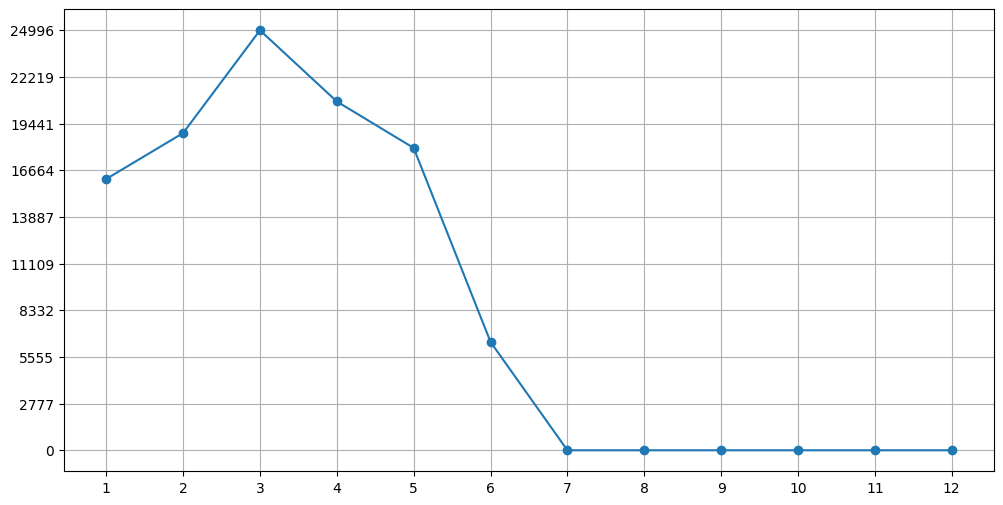

In [74]:
plot_publications_for_year(2020)

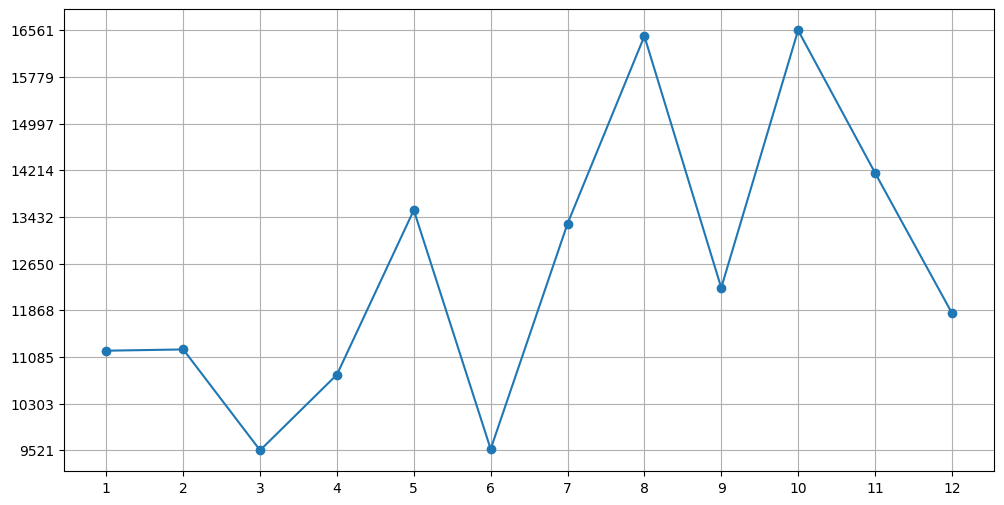

In [75]:
plot_publications_for_year(2019)

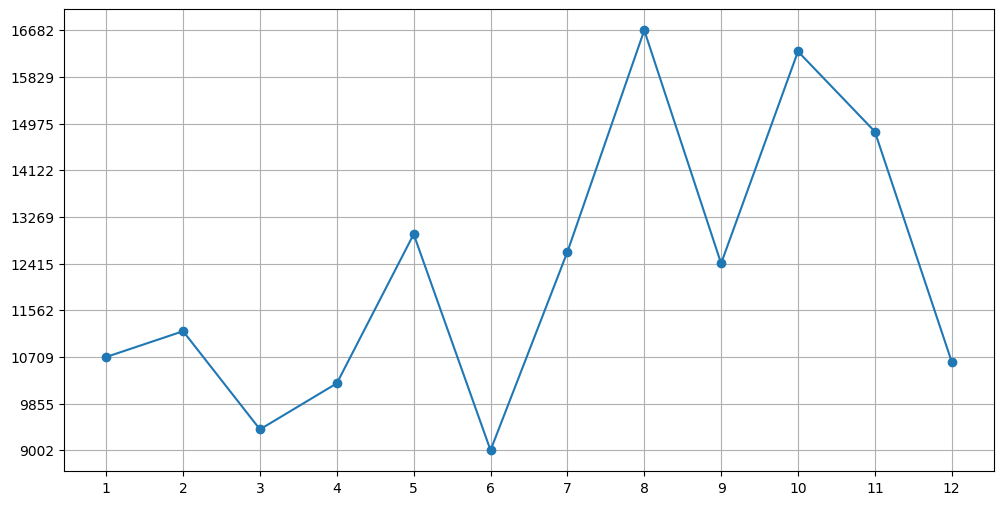

In [76]:
plot_publications_for_year(2018)

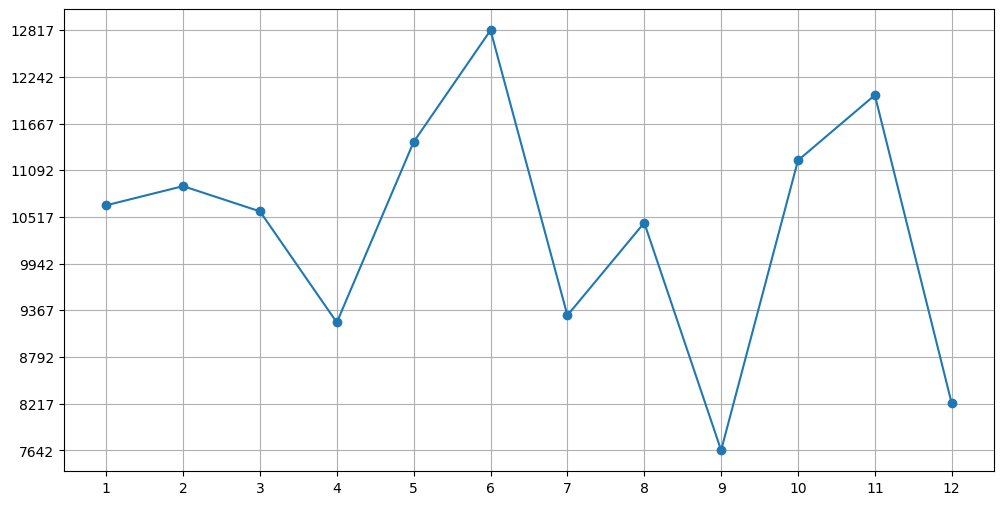

In [77]:
plot_publications_for_year(2017)